# Cardiovascular Disease Model#

To predict whether individuals have cardiovascular disease or not.

Dataset from: https://www.kaggle.com/raminhashimzade/cardio-disease

The dataset contains 13 columns and a target column:

1. Id number
2. Age in days
3. Age in years
4. Gender (1 - women; 2 - men)
5. Height in cm.
6. Weight in kg.
7. Systolic blood Pressure (ap_hi)
8. Diastolic blood pressure (ap_lo)
9. Cholesterol (1 - normal; 2 - above normal; 3 - well above normal)
10. Glucose(Glu) (1 - normal; 2 - above normal; 3 - well above normal)
11. Smoking (0 - no; 1 - yes)
12. Alcohol intake (0 - no; 1 - yes)
13. Physical activity (0 - passive life, 1 - active life)
14. Target variable: Presence or absence of cardiovascular disease(cardio)(0 - no; 1 - yes)


#  Import Library and File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')

# Data Exploration #

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age_days     70000 non-null  int64  
 2   age_year     70000 non-null  float64
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 7.5 MB


**no missing data**

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.000000,25006.750000,50001.500000,74889.250000,99999.000000
age_days,70000.0,19468.865814,2467.251667,10798.000000,17664.000000,19703.000000,21327.000000,23713.000000
age_year,70000.0,53.339358,6.759594,29.583562,48.394521,53.980822,58.430137,64.967123
gender,70000.0,1.349571,0.476838,1.000000,1.000000,1.000000,2.000000,2.000000
height,70000.0,164.359229,8.210126,55.000000,159.000000,165.000000,170.000000,250.000000
weight,70000.0,74.205690,14.395757,10.000000,65.000000,72.000000,82.000000,200.000000
ap_hi,70000.0,128.817286,154.011419,-150.000000,120.000000,120.000000,140.000000,16020.000000
ap_lo,70000.0,96.630414,188.472530,-70.000000,80.000000,80.000000,90.000000,11000.000000
cholesterol,70000.0,1.366871,0.680250,1.000000,1.000000,1.000000,2.000000,3.000000
gluc,70000.0,1.226457,0.572270,1.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
data.corr()

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age_days,0.003457,1.000000,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
age_year,0.003457,1.000000,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307


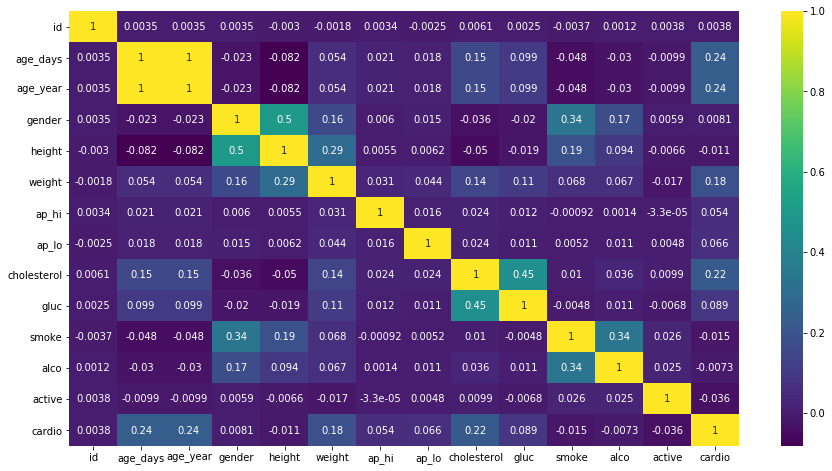

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

# Target Variable: cardio #

(0 - no; 1 - yes)

**well-balance classes**

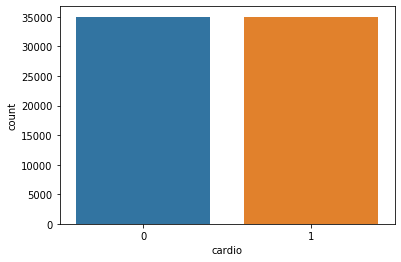

In [7]:
sns.countplot('cardio',data=data)

# Data Preprocessing : Featue Engineering # 

**1. age_days,** **age_year**
      
The 'age_days' and 'age_year' are the same, so I drop the 'age_days' column.


In [8]:
data = data.drop('age_days',axis=1)

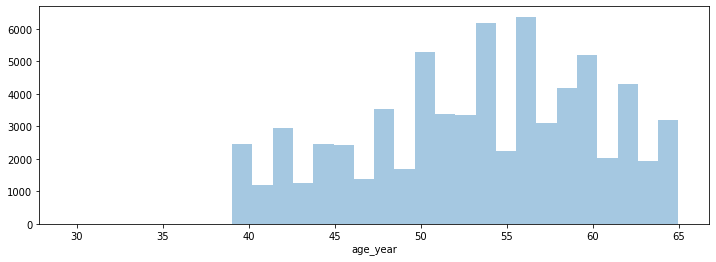

In [9]:
plt.figure(figsize=(12,4))
sns.distplot(data['age_year'],kde=False,bins=30)

The above graph is Left skewed distribution, so I correct this with binning.

**Binning** 

min 29, max 64

The major risk factor for artherosclerotic cardiovascular disease in males is >=45 and in females is >=55.

So I set 3 ranges of age groups: [ '<45' , '45-54' , '55-65']

And then convert to an ordinal column 'age_range' of [0,1,2].


In [10]:
cut_points = [0,44,54,64]
label_names = [0,1,2]

data['age_year'] = data['age_year'].apply(int)
data['age_range'] = pd.cut(data['age_year'],cut_points,labels=label_names)

In [11]:
data['age_range'] = data['age_range'].astype('int64')

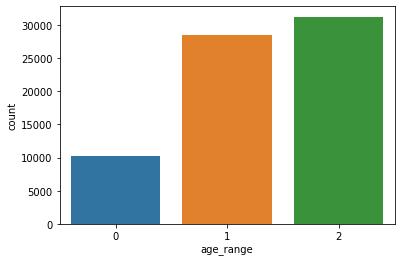

In [12]:
sns.countplot('age_range',data=data)

In [13]:
data = data.drop('age_year',axis=1)

**2. gender**

Given a categorical column of gender (1 - women; 2 - men).

Convert the column to dummies variable instead.


In [14]:
data['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [15]:
gender = pd.get_dummies(data['gender'],drop_first=True)
data = pd.concat([data,gender],axis=1)

In [16]:
data = data.drop('gender',axis=1)

In [17]:
data = data.rename({2:'men'},axis=1)

In [18]:
data.head()

,id,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_range,men
0,0,168,62.0,110,80,1,1,0,0,1,0,1,1
1,1,156,85.0,140,90,3,1,0,0,1,1,2,0
2,2,165,64.0,130,70,3,1,0,0,0,1,1,0
3,3,169,82.0,150,100,1,1,0,0,1,1,1,1
4,4,156,56.0,100,60,1,1,0,0,0,0,1,0


**3. height in cm**


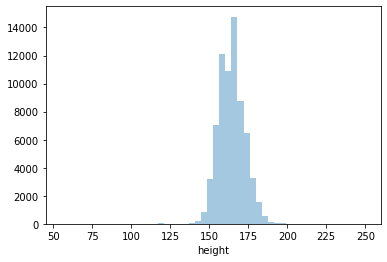

In [19]:
plt.figure(figsize=(6,4))
sns.distplot(data['height'],kde=False,bins=50)

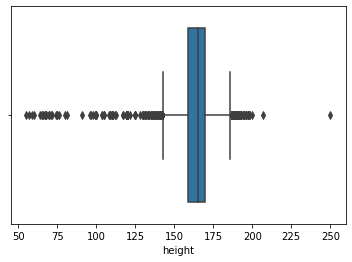

In [20]:
sns.boxplot(x=data['height'])

**There are some outliers.**

I manage this with Z-score with cutpoints of -3 and +3.

In [21]:
from scipy import stats

In [22]:
data['height_z'] = np.abs(stats.zscore(data['height']))

In [23]:
data[data['height_z']>=3]

,id,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_range,men,height_z
224,309,76,55.0,120,80,1,1,0,0,1,0,2,1,10.762302
1027,1432,195,111.0,148,86,1,1,0,0,1,1,0,1,3.732097
1117,1554,198,68.0,120,80,1,1,0,0,1,1,2,1,4.097502
2160,3049,196,74.0,140,90,1,1,1,1,1,1,0,1,3.853899
2412,3399,138,52.0,140,100,1,1,0,0,1,1,2,1,3.210598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67972,97080,195,90.0,120,80,1,1,0,0,0,0,2,1,3.732097
69052,98630,120,80.0,140,90,1,2,0,0,1,1,2,1,5.403028
69124,98728,138,60.0,110,80,1,1,0,0,0,0,0,1,3.210598
69216,98862,190,87.0,120,80,1,1,0,0,0,0,2,0,3.123089


There are 293 rows with outliers of 70,000 rows(0.4%), so I drop the rows with outliers.

In [24]:
data = data[data['height_z']<3]

In [25]:
data = data.drop('height_z',axis=1)

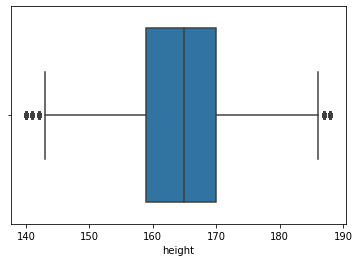

In [26]:
sns.boxplot(x=data['height'])

**4. Weight in kg**

There are some outliers, so I manage this in the same way as the height column.

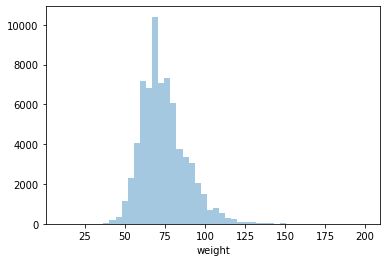

In [27]:
plt.figure(figsize=(6,4))
sns.distplot(data['weight'],kde=False,bins=50)

In [28]:
data['weight_z'] = np.abs(stats.zscore(data['weight']))

In [29]:
data[data['weight_z']>=3]

,id,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_range,men,weight_z
338,474,157,142.0,120,80,1,1,0,0,1,1,2,0,4.738489
389,552,165,169.0,120,80,1,1,0,0,1,0,1,1,6.624597
435,618,186,200.0,130,70,1,1,0,0,0,0,1,0,8.790128
446,634,178,120.0,160,90,1,3,0,0,1,1,2,1,3.201661
591,846,164,125.0,130,90,1,1,0,0,0,0,0,0,3.550940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69012,98584,170,123.0,130,90,1,1,0,0,1,0,1,0,3.411228
69060,98640,163,119.0,160,90,1,1,0,0,1,1,1,0,3.131805
69109,98709,175,155.0,110,100,1,1,0,0,1,1,1,1,5.646615
69440,99182,180,123.0,190,99,2,1,0,0,0,1,2,1,3.411228


There are 679 rows with outliers of 69,707 rows(0.9%), so I drop the rows with outliers

In [30]:
data = data[data['weight_z']<3]

In [31]:
data = data.drop('weight_z',axis=1)

**5. Systolic Blood pressure (ap_hi)**

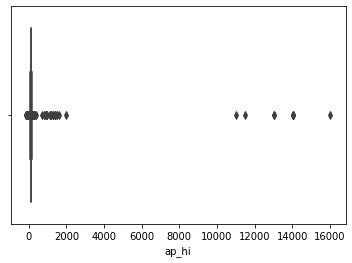

In [32]:
sns.boxplot(x=data['ap_hi'])

**Inspect some impossible data**

People with systolic blood pressure more than 200 are more likely to be critically ill, not compatible with the setting in which data collected. 
And systolic blood pressure more than 300 more likely to be wrong input.

Systolic blood pressures below 80 are seen in children, but data is collected in adults more than 29 years old.

In [33]:
data[data['ap_hi']>200]['ap_hi']

1328      220
1876      902
2014      906
2142      210
2278      220
         ... 
67710     240
68579     220
68663     906
69329     240
69370    2000
Name: ap_hi, Length: 99, dtype: int64

In [34]:
data[data['ap_hi']<80]['ap_hi']

567      14
636      70
927      14
979      11
1600     12
         ..
68630    12
68742    14
68998    14
69137    12
69549    13
Name: ap_hi, Length: 204, dtype: int64

There are 303 rows with outliers of 69,028 rows(0.4%), so I drop the rows with outliers

In [35]:
data = data[(data['ap_hi']>= 80) & (data['ap_hi']<= 200)]

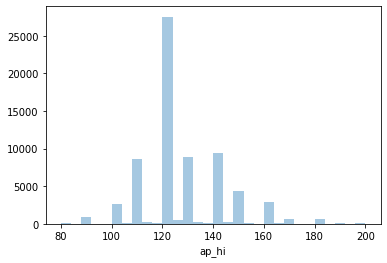

In [36]:
plt.figure(figsize=(6,4))
sns.distplot(data['ap_hi'],kde=False,bins=30)

**6. Diastolic Blood pressure (ap_lo)**

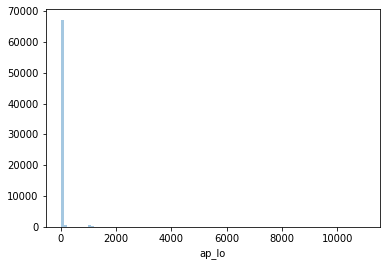

In [37]:
plt.figure(figsize=(6,4))
sns.distplot(data['ap_lo'],kde=False,bins=100)

**Consider impossible value**
1. Diastolic blood pressure <0

There are some rows with diastolic blood pressure below 0, but they were dropped in the previous cell.

In [38]:
data[data['ap_lo']<0]

,id,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_range,men


2. Diastolic blood pressure > Systolic blood pressure 

Individuals cannot have diastolic blood pressure more than systolic blood pressure.

In [39]:
data[data['ap_lo'] > data['ap_hi']]

,id,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_range,men
228,314,183,98.0,160,1100,1,2,1,0,1,1,1,1
241,334,157,60.0,160,1000,2,1,0,0,0,1,2,1
260,357,150,83.0,140,800,1,1,0,0,1,1,1,0
329,458,176,63.0,160,1000,2,2,0,0,0,1,2,0
345,482,154,81.0,140,1000,2,1,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,167,81.0,160,1000,1,1,0,0,1,1,2,0
69872,99798,152,56.0,160,1000,1,1,0,0,1,1,2,0
69878,99807,168,95.0,160,1000,1,1,0,0,1,1,2,1
69885,99816,166,78.0,170,1000,1,1,0,0,0,0,2,1


In [40]:
data = data[data['ap_lo'] < data['ap_hi']]

3. Extremely low diastolic blood pressure

Diastolic blood pressures below 40 are founded in children, but the data is collected in adults more than 29 years old.

In [41]:
data[data['ap_lo']<40]['ap_lo'].value_counts()

20    14
0     12
30     6
10     6
7      2
6      2
9      1
1      1
Name: ap_lo, dtype: int64

In [42]:
data = data[data['ap_lo']>40]

**7. Cholesterol**

Ordinal column

(1 - normal; 2 - above normal; 3 - well above normal)

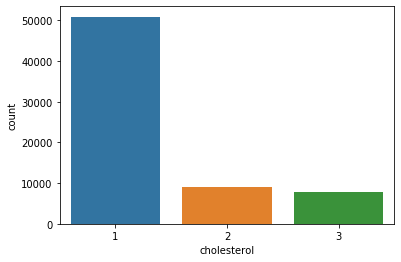

In [43]:
sns.countplot('cholesterol',data=data)

**8. gluc : glucose**

Ordinal column

(1 - normal; 2 - above normal; 3 - well above normal)

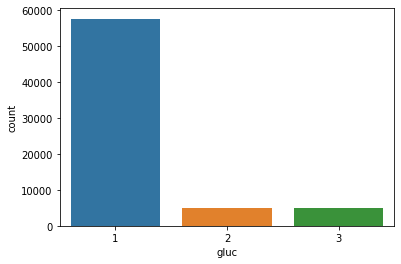

In [44]:
sns.countplot('gluc',data=data)

**9. smoke**

Categorical column

(whether patient smokes or not(0 - no; 1 - yes))

In [45]:
data['smoke'].value_counts()

0    61764
1     5907
Name: smoke, dtype: int64

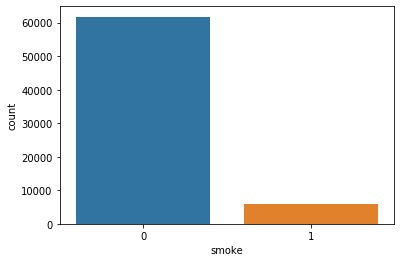

In [46]:
sns.countplot('smoke',data=data)

**10.Alcohol (alco)**

Categorical column

Alcohol intake (0 - no; 1 - yes)

In [47]:
data['alco'].value_counts()

0    64091
1     3580
Name: alco, dtype: int64

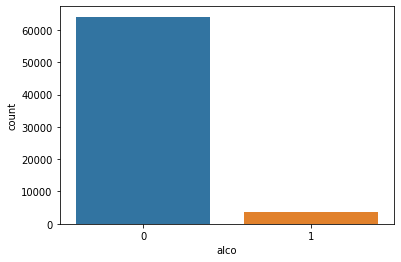

In [48]:
sns.countplot('alco',data=data)

**11. Physical activity (Active)**

Categorical column

(0 - passive life, 1 - active life)

In [49]:
data['active'].value_counts()

1    54396
0    13275
Name: active, dtype: int64

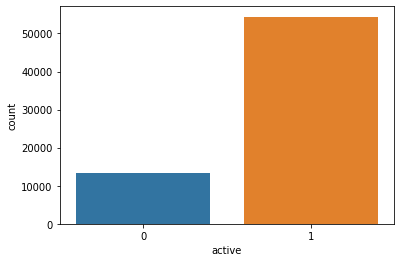

In [50]:
sns.countplot('active',data=data)

# Reevaluate after data preprocessing

In [51]:
data

,id,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_range,men
0,0,168,62.0,110,80,1,1,0,0,1,0,1,1
1,1,156,85.0,140,90,3,1,0,0,1,1,2,0
2,2,165,64.0,130,70,3,1,0,0,0,1,1,0
3,3,169,82.0,150,100,1,1,0,0,1,1,1,1
4,4,156,56.0,100,60,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,165,80.0,150,80,1,1,0,0,1,1,2,0
69995,99993,168,76.0,120,80,1,1,1,0,1,0,1,1
69997,99996,183,105.0,180,90,3,1,0,1,0,1,1,1
69998,99998,163,72.0,135,80,1,2,0,0,0,1,2,0


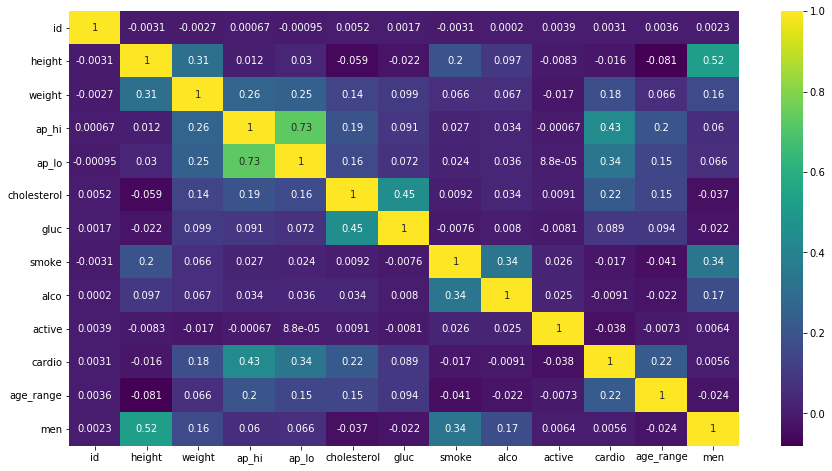

In [52]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

<Figure size 720x432 with 0 Axes>

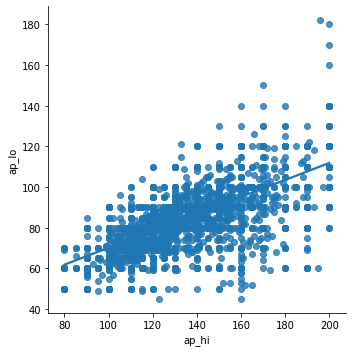

In [53]:
plt.figure(figsize=(10,6))
sns.lmplot(x='ap_hi',y='ap_lo',data=data)

The 'ap_hi' and 'ap_lo' seems to be collinearity, so choose only the 'ap_hi' due to a little bit higher correlation. 

## Data Preprocessing : Feature Selection #
drop id and ap_lo column

In [54]:
data.columns

Index(['id', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'age_range', 'men'],
      dtype='object')

In [55]:
optimized_column = ['height', 'weight', 'ap_hi', 'cholesterol', 'gluc',

       'smoke', 'alco', 'active', 'age_range', 'men']

In [56]:
X = data[optimized_column]

In [57]:
X

,height,weight,ap_hi,cholesterol,gluc,smoke,alco,active,age_range,men
0,168,62.0,110,1,1,0,0,1,1,1
1,156,85.0,140,3,1,0,0,1,2,0
2,165,64.0,130,3,1,0,0,0,1,0
3,169,82.0,150,1,1,0,0,1,1,1
4,156,56.0,100,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
69994,165,80.0,150,1,1,0,0,1,2,0
69995,168,76.0,120,1,1,1,0,1,1,1
69997,183,105.0,180,3,1,0,1,0,1,1
69998,163,72.0,135,1,2,0,0,0,2,0


In [58]:
y = data['cardio']

# Train/Test split #

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=99,stratify=y)

# Normailizing Data #

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
scaler = MinMaxScaler()

In [63]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [64]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Creating Models : 1. Logistic Regression #

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
lr = LogisticRegression()

In [67]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
predictions = lr.predict(X_test)

# Logistic Regression: Model Evaluation 

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      6870
           1       0.76      0.65      0.70      6665

    accuracy                           0.73     13535
   macro avg       0.73      0.73      0.73     13535
weighted avg       0.73      0.73      0.73     13535



In [71]:
print(confusion_matrix(y_test,predictions))

[[5515 1355]
 [2306 4359]]


**Evaluation on training data**

It shows no overfitting.

In [72]:
predict_train = lr.predict(X_train)
print(classification_report(y_train,predict_train))

              precision    recall  f1-score   support

           0       0.70      0.79      0.75     27479
           1       0.75      0.65      0.70     26657

    accuracy                           0.72     54136
   macro avg       0.73      0.72      0.72     54136
weighted avg       0.73      0.72      0.72     54136



# Logistic Regression: Model Tuning #

**1. RFECV**

Try RFECV but fail to converge.

In [73]:
#from sklearn.feature_selection import RFECV
#selector = RFECV(lr,cv=100)
#selector.fit(X,y)

**2. Grid search CV**

Try GridSearchCV but fail to converge.

In [74]:
#from sklearn.model_selection import GridSearchCV
#hyperparameters = {"C":np.logspace(0,4,10), "penalty":["l2","l1"], "solver":["liblinear"]}

In [75]:
#grid = GridSearchCV(lr,param_grid=hyperparameters,cv=10)
#grid.fit(X,y)

# Creating Models : 2. Random Forest #

In [76]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200,random_state=99)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=99, verbose=0,
                       warm_start=False)

In [77]:
rfc_pred = rfc.predict(X_test)

In [78]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      6870
           1       0.69      0.67      0.68      6665

    accuracy                           0.69     13535
   macro avg       0.69      0.69      0.69     13535
weighted avg       0.69      0.69      0.69     13535



# Creating Models : 3. XGBoost #

In [79]:
from xgboost import XGBClassifier

In [80]:
xgb_model = XGBClassifier()

In [81]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
xgb_pred = xgb_model.predict(X_test)

In [83]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      6870
           1       0.76      0.67      0.71      6665

    accuracy                           0.74     13535
   macro avg       0.74      0.73      0.73     13535
weighted avg       0.74      0.74      0.73     13535



# Creating Models: 4. Neural Network

In [84]:
X_train.shape

(54136, 10)

In [85]:
#X_train = X_train.values
#X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [86]:
import tensorflow as tf

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [88]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',patience=10)
check_point = tf.keras.callbacks.ModelCheckpoint('cardio_disease_weight.hdf5', monitor='val_accuracy',save_best_only=True)

In [89]:
nn_model = Sequential()

nn_model.add(Dense(units=10,activation='relu'))
nn_model.add(Dense(units=5,activation='relu'))

nn_model.add(Dense(units=1, activation='sigmoid'))

nn_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [90]:
nn_model.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_test,y_test),verbose=1,callbacks=[early_stop,check_point])

Train on 54136 samples, validate on 13535 samples
Epoch 1/100
54136/54136 [==============================] - 3s 58us/sample - loss: 0.6223 - accuracy: 0.6517 - val_loss: 0.5671 - val_accuracy: 0.7183
Epoch 2/100
54136/54136 [==============================] - 3s 49us/sample - loss: 0.5642 - accuracy: 0.7189 - val_loss: 0.5546 - val_accuracy: 0.7301
Epoch 3/100
54136/54136 [==============================] - 2s 41us/sample - loss: 0.5597 - accuracy: 0.7235 - val_loss: 0.5526 - val_accuracy: 0.7314
Epoch 4/100
54136/54136 [==============================] - 2s 36us/sample - loss: 0.5588 - accuracy: 0.7240 - val_loss: 0.5515 - val_accuracy: 0.7308
Epoch 5/100
54136/54136 [==============================] - 2s 38us/sample - loss: 0.5581 - accuracy: 0.7232 - val_loss: 0.5525 - val_accuracy: 0.7308
Epoch 6/100
54136/54136 [==============================] - 2s 38us/sample - loss: 0.5575 - accuracy: 0.7238 - val_loss: 0.5508 - val_accuracy: 0.7328
Epoch 7/100
54136/54136 [=========================

Epoch 55/100
54136/54136 [==============================] - 2s 44us/sample - loss: 0.5465 - accuracy: 0.7269 - val_loss: 0.5401 - val_accuracy: 0.7351
Epoch 56/100
54136/54136 [==============================] - 2s 40us/sample - loss: 0.5466 - accuracy: 0.7279 - val_loss: 0.5404 - val_accuracy: 0.7337


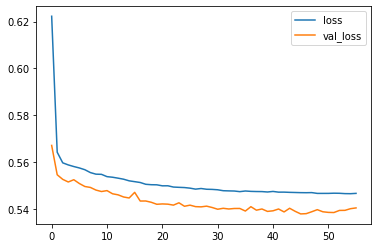

In [91]:
nn_model_loss = pd.DataFrame(nn_model.history.history)
nn_model_loss['loss'].plot()
nn_model_loss['val_loss'].plot()
plt.legend()

In [92]:
nn_predict = nn_model.predict_classes(X_test)

In [93]:
print(classification_report(y_test,nn_predict))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6870
           1       0.75      0.68      0.72      6665

    accuracy                           0.73     13535
   macro avg       0.74      0.73      0.73     13535
weighted avg       0.74      0.73      0.73     13535



# Summary

| Model | Accuracy | Sensitivity | Specificity 
| --- | --- | --- | --- |
| Logistic Regression | 0.73 | 0.65 | 0.80 |
| Random forest | 0.69 | 0.67 | 0.71 |
| XGBoost | 0.74 | 0.67 | 0.80 |
| Neural Network | 0.73 | 0.68 | 0.78 |

The XGboost has maximum overall accuracy.

But in the case that we want to screen the patient whether they are at high risk of having cardiovascular disease or not and then do further investigation. We need to choose the one with the highest sensitivity, which is the neural network.
